# Warning: if you are using Colab

If you are currently running on Colab, you need to install ```tensorflow``` v-2.1.0 (instead of the default v-2.2.0) and ```keract``` beforehand.

In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.2.0rc1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.2.0rc1


In [2]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 43kB/s 
     |████████████████████████████████| 450kB 47.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=a2f6106fbb111e1889abf0e9598ed7ec7787ac7175675c4797fb3333488e58cf
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [3]:
!pip install keract

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os 
os.chdir('/content/drive/My Drive/MVA/S2/DLMI')

# Imports

In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import keract
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from utils.evaluation import *
from utils.utils import read_dataset,split_dataset,visualize_mitbih
import tensorflow_addons as tfa

Using TensorFlow backend.


# 1. Data importation and visualization

In [0]:
data,labels = read_dataset('mitbih_train.csv','MIT-BIH')

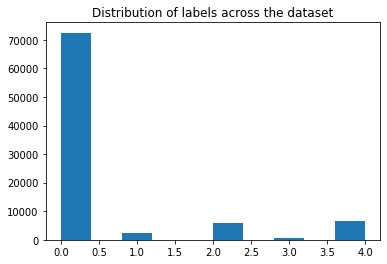

In [0]:
plt.hist(labels)
plt.title('Distribution of labels across the dataset')
plt.show()

In [0]:
unique_labels,props = np.unique(labels,return_counts=True)
df_props = pd.DataFrame([],columns=['proportion'],index = unique_labels)
df_props.index.name='label'
df_props['proportion'] = props/np.sum(props)
df_props

,proportion
label,
0,0.827729
1,0.025390
2,0.066108
3,0.007321
4,0.073452


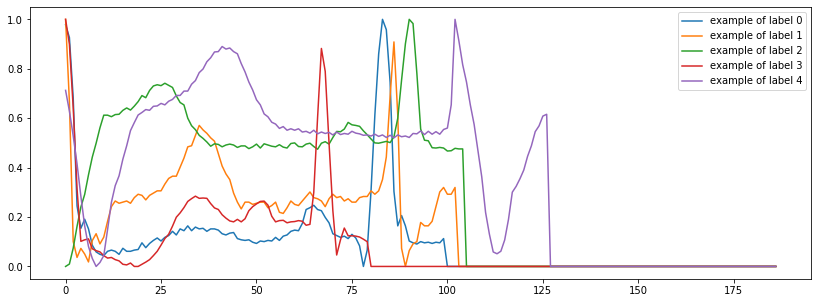

In [0]:
visualize_mitbih(data,labels)

# 2. Splitting dataset

We first split the dataset into three parts (training validation test), while keeping the proportions intact.

In [0]:
xtrain,ytrain,xval,yval,y_val_true, xtest,ytest,y_test_true = split_dataset(data,labels,validation=True)

# 3. Testing models

## 3.1 MLP

In [0]:
from models.mlp import Classifier_MLP

### 3.1.1 Training

In [38]:
mlp = Classifier_MLP(output_directory='outputs/output_mlp/',input_shape=(data.shape[1],),
                     nb_classes = 5,verbose=True,
                     hidden_layers_size=(500,500,500))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 187)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 187)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               94000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)              

Epoch 1/150
821/821 [==============================] - 4s 5ms/step - loss: 1.3231 - accuracy: 0.7610 - val_loss: 1.0802 - val_accuracy: 0.8277 - lr: 0.0010
Epoch 2/150
821/821 [==============================] - 3s 4ms/step - loss: 0.9474 - accuracy: 0.8277 - val_loss: 0.8601 - val_accuracy: 0.8277 - lr: 0.0010
Epoch 3/150
821/821 [==============================] - 3s 4ms/step - loss: 0.8327 - accuracy: 0.8277 - val_loss: 0.7972 - val_accuracy: 0.8277 - lr: 0.0010
Epoch 4/150
821/821 [==============================] - 3s 4ms/step - loss: 0.7864 - accuracy: 0.8277 - val_loss: 0.7533 - val_accuracy: 0.8277 - lr: 0.0010
Epoch 5/150
821/821 [==============================] - 3s 4ms/step - loss: 0.7501 - accuracy: 0.8277 - val_loss: 0.7144 - val_accuracy: 0.8277 - lr: 0.0010
Epoch 6/150
821/821 [==============================] - 3s 3ms/step - loss: 0.7184 - accuracy: 0.8277 - val_loss: 0.6776 - val_accuracy: 0.8277 - lr: 0.0010
Epoch 7/150
821/821 [==============================] - 3s 3ms/st

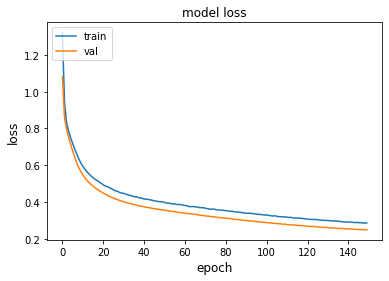

In [39]:
%matplotlib inline
hist = mlp.fit(xtrain,ytrain,xval,yval,y_val_true,batch_size=64,nb_epochs=150)

Let's evaluate our predictions on the validation set: 

In [0]:
mlp_model = tf.keras.models.load_model('outputs/output_mlp/best_model.hdf5')

In [21]:
ypred = mlp_model.predict(xval)
ypred = np.argmax(ypred,axis=1)
evaluate(y_val_true,ypred)

,accuracy,recall,precision,f1-score
0,0.930615,0.555113,0.690763,0.596122


### 3.1.2 Evaluating on the test set

In [0]:
mlp_model = tf.keras.models.load_model('outputs/output_mlp/best_model.hdf5')

In [7]:
ypred = mlp_model.predict(xtest)
ypred = np.argmax(ypred,axis=1)
evaluate(y_test_true,ypred)

,accuracy,recall,precision,f1-score
0,0.927074,0.542247,0.690165,0.584042


Let's be more precise on each class. The following scores are computed considering each label against all the others.

In [24]:
get_binary_metrics(y_test_true,ypred)

,recall,precision,f1-score
0,0.987513,0.937455,0.961833
1,0.265169,0.802721,0.398649
2,0.571305,0.835651,0.678645
3,0,0,0
4,0.887247,0.875,0.881081


/content/drive/My Drive/MVA/S2/DLMI/utils/evaluation.py:36: RuntimeWarning: invalid value encountered in true_divide
  cm = np.round(cm/cm.sum(axis=0),3)


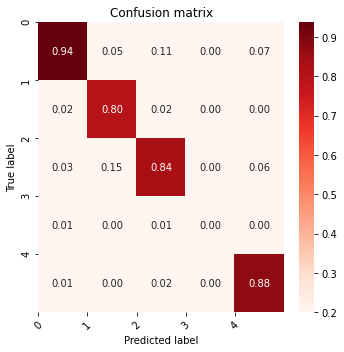

In [15]:
plot_confusion_matrix(y_test_true,ypred)

## 3.2 CNN

In [0]:
from models.CNN_1D import Classifier_1DCNN

### 3.2.1 Training

In [0]:
#convolutional layers require a different shape
xtrain_r = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xval_r = xval.reshape(xval.shape[0],xval.shape[1],1)

In [26]:
cnn = Classifier_1DCNN('outputs/output_1DCNN/', nb_classes=5,
                       n_conv_block=2, n_filters=(64,64), kern_size=(5,5), 
                       n_stride=(1,1), 
                       input_shape=(data.shape[1],1), 
                       add_FC=True, n_unit_FC=100,
                       verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 187, 64)           384       
_________________________________________________________________
batch_normalization (BatchNo (None, 187, 64)           256       
_________________________________________________________________
activation (Activation)      (None, 187, 64)           0         
_________________________________________________________________
dropout (Dropout)            (None, 187, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 187, 64)           20544     
_________________________________________________________________
batch_normalization_1 (Batch (None, 187, 64)           256       
_________________________________________________________________
activation_1 (Activation)    (None, 187, 64)           0

Train on 52532 samples, validate on 17511 samples
Epoch 1/25
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
52532/52532 [==============================] - 21s 400us/sample - loss: 0.1772 - accuracy: 0.9504 - val_loss: 0.1867 - val_accuracy: 0.9580
Epoch 2/25
52532/52532 [==============================] - 18s 335us/sample - loss: 0.1125 - accuracy: 0.9688 - val_loss: 0.1314 - val_accuracy: 0.9678
Epoch 3/25
52532/52532 [==============================] - 17s 333us/sample - loss: 0.0921 - accuracy: 0.9734 - val_loss: 0.0884 - val_accuracy: 0.9757
Epoch 4/25
52532/52532 [==============================] - 18s 343us/sample - loss: 0.0809 - accuracy: 0.9760 - val_loss: 0.0756 - val_accuracy: 0.9794
Epoch 5/25
52532/52532 [==============================] - 18s 340us/sample - loss: 0.0704 - accuracy: 0.9793 - val_loss: 0.0808 - val_accuracy: 0.9789
Epoch 6/25
52532/52532 [==============================] - 18s 347us/sample - loss: 0.0633 - accuracy: 0.9815 - val

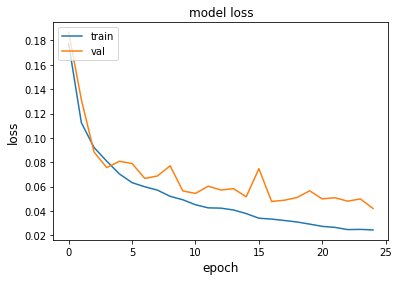

In [27]:
%matplotlib inline
hist = cnn.fit(xtrain_r,ytrain,xval_r,yval,y_val_true,batch_size=32,nb_epochs=25)

In [0]:
cnn_model = tf.keras.models.load_model('outputs/output_1DCNN/best_model.hdf5',
                                       custom_objects={'SWA': tfa.optimizers.SWA})

In [30]:
ypred = cnn_model.predict(xval_r)
ypred = np.argmax(ypred,axis=1)
evaluate(y_val_true,ypred)

,accuracy,recall,precision,f1-score
0,0.987665,0.917764,0.952533,0.934047


### 3.2.2 Evaluating on the test set

In [0]:
xtest_r = xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [0]:
cnn_model = tf.keras.models.load_model('outputs/output_1DCNN/best_model.hdf5',
                                       custom_objects={'SWA': tfa.optimizers.SWA})

In [33]:
ypred = cnn_model.predict(xtest_r)
ypred = np.argmax(ypred,axis=1)
evaluate(y_test_true,ypred)

,accuracy,recall,precision,f1-score
0,0.987151,0.926993,0.940295,0.93298


Let's be more precise

In [34]:
get_binary_metrics(y_test_true,ypred)

,recall,precision,f1-score
0,0.994688,0.99236,0.993523
1,0.824719,0.929114,0.87381
2,0.966292,0.962134,0.964209
3,0.859375,0.833333,0.846154
4,0.989891,0.984532,0.987204


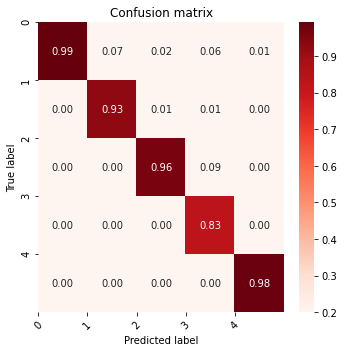

In [35]:
plot_confusion_matrix(y_test_true,ypred)

## 3.3 ResNet

In [0]:
from models.resnet import Classifier_RESNET

### 3.3.1 Training

In [0]:
#resnet requires a different shape since it is based on convolutional layers
xtrain_r = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xval_r = xval.reshape(xval.shape[0],xval.shape[1],1)

In [12]:
resnet = Classifier_RESNET('outputs/output_resnet/',input_shape=(data.shape[1],1),
                           nb_classes=5,n_feature_maps = (50,100,100),kernel_size=(8,5,3,2),
                           verbose=1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 187, 50)      450         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 187, 50)      200         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 187, 50)      0           batch_normalization[0][0]        
______________________________________________________________________________________________

Train on 52532 samples, validate on 17511 samples
Epoch 1/100
52532/52532 [==============================] - 37s 703us/sample - loss: 0.1883 - accuracy: 0.9470 - val_loss: 0.2130 - val_accuracy: 0.9500
Epoch 2/100
52532/52532 [==============================] - 27s 506us/sample - loss: 0.1228 - accuracy: 0.9655 - val_loss: 0.1893 - val_accuracy: 0.9365
Epoch 3/100
52532/52532 [==============================] - 26s 504us/sample - loss: 0.1064 - accuracy: 0.9701 - val_loss: 0.1272 - val_accuracy: 0.9668
Epoch 4/100
52532/52532 [==============================] - 26s 503us/sample - loss: 0.0945 - accuracy: 0.9740 - val_loss: 0.1766 - val_accuracy: 0.9396
Epoch 5/100
52532/52532 [==============================] - 26s 504us/sample - loss: 0.0860 - accuracy: 0.9763 - val_loss: 0.1158 - val_accuracy: 0.9677
Epoch 6/100
52532/52532 [==============================] - 26s 502us/sample - loss: 0.0781 - accuracy: 0.9783 - val_loss: 0.0906 - val_accuracy: 0.9756
Epoch 7/100
52532/52532 [=============

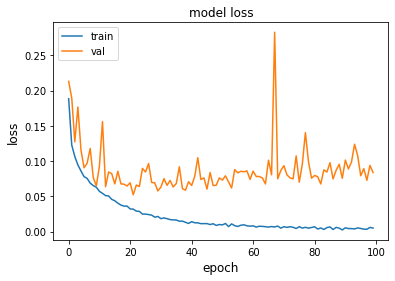

In [13]:
%matplotlib inline
hist = resnet.fit(xtrain_r,ytrain,xval_r,yval,y_val_true,batch_size=32,nb_epochs=100)

In [0]:
resnet_model = tf.keras.models.load_model('outputs/output_resnet/best_model.hdf5')

In [15]:
ypred = resnet_model.predict(xval_r)
ypred = np.argmax(ypred,axis=1)
evaluate(y_val_true,ypred)

,accuracy,recall,precision,f1-score
0,0.987151,0.922053,0.945518,0.933378


### 3.3.2 Evaluating on the test set

In [0]:
xtest_r = xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [0]:
resnet_model = tf.keras.models.load_model('outputs/output_resnet/best_model.hdf5')

In [18]:
ypred = resnet_model.predict(xtest_r)
ypred = np.argmax(ypred,axis=1)
evaluate(y_test_true,ypred)

,accuracy,recall,precision,f1-score
0,0.986808,0.924894,0.924854,0.924397


In [19]:
get_binary_metrics(y_test_true,ypred)

,recall,precision,f1-score
0,0.995378,0.991343,0.993356
1,0.840449,0.869767,0.854857
2,0.946413,0.990054,0.967742
3,0.851562,0.778571,0.813433
4,0.990669,0.994536,0.992598


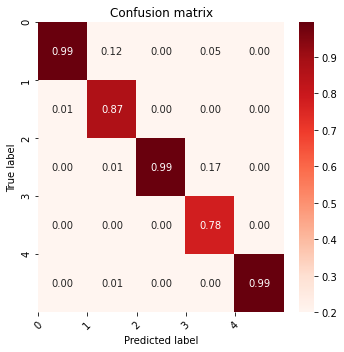

In [20]:
plot_confusion_matrix(y_test_true,ypred)

# 4. Interpreting models

In [0]:
from interpretation.cam import display_conv_activations

## 4.1 1D-CNN model

In [0]:
cnn_model = tf.keras.models.load_model('outputs/output_1DCNN/best_model.hdf5',
                                       custom_objects={'SWA': tfa.optimizers.SWA})

Let's focus on samples which were not classified as normal by our model.

In [0]:
ypred = np.argmax(cnn_model.predict(xtest_r),axis=1)
not_normal = []
for i in range(len(ypred)):
    if not ypred[i]==0: 
        not_normal.append(i)

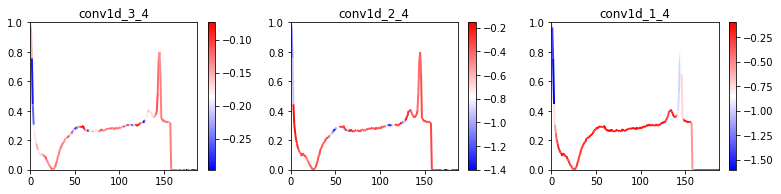

In [40]:
display_conv_activations(cnn_model,xtest_r[not_normal[0]])

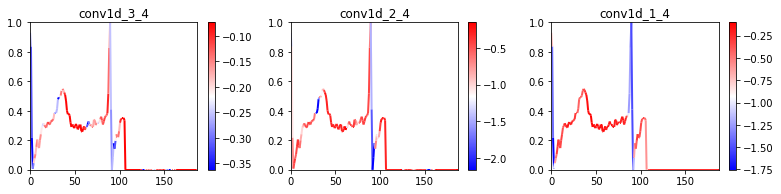

In [39]:
display_conv_activations(cnn_model,xtest_r[not_normal[1]])

## 4.2 ResNet model

In [0]:
resnet_model = tf.keras.models.load_model('outputs/output_resnet/best_model.hdf5')

In [0]:
ypred = np.argmax(resnet_model.predict(xtest_r),axis=1)
not_normal = []
for i in range(len(ypred)):
    if not ypred[i]==0: 
        not_normal.append(i)

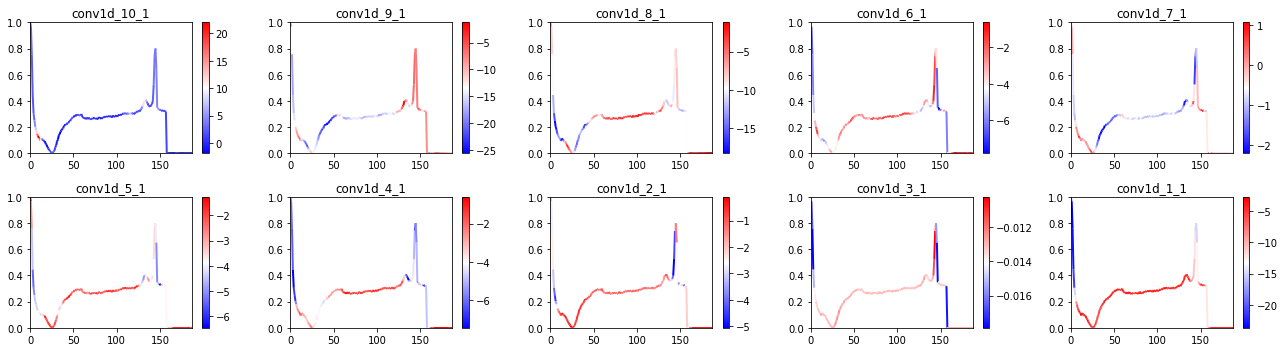

In [23]:
display_conv_activations(resnet_model,xtest_r[not_normal[0]])

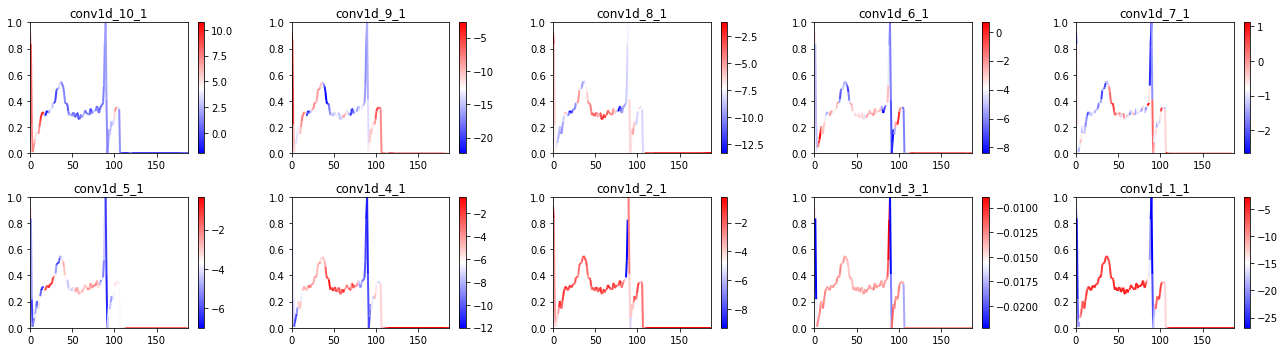

In [24]:
display_conv_activations(resnet_model,xtest_r[not_normal[1]])